# Package Import

In [40]:
import seaborn as sns
import os
import pickle
import statistics
import matplotlib.pyplot as plt

# Helper Functions

In [41]:

# in: main directory name (../data)
# out: list of subdirectories
def get_subdirectories(a_dir):
    return [a_dir + '/' + name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]


# in: directory name
# out: list of .pkl files within directory
def get_files(dir_name):
    files = [dir_name + '/' + f for f in os.listdir(dir_name) if f.endswith('.pkl')]
    return files



# in: list of .pkl files within directory
# out: dict that maps mem_items.pkl to corresponding previous_items.pkl
def make_run_dict(files):
    runs = {}
    
    for f in files:
        if f.endswith('mem_items.pkl'):
            runs[f] = f[0:-13] + 'previous_items.pkl'
            
    return runs


# in: run is the name of mem_items.pkl, runs[run] is the name of corresponding previous_items.pkl
#     mass is the aggregate data
# out: none, prints if outlier
def is_outlier(mass, runs):

    cued_avg = np.mean(mass['cued_RT']) 
    uncued_avg = np.mean(mass['uncued_RT'])
    cued_sd = 3 * statistics.stdev(mass['cued_RT'])
    uncued_sd = 3 * statistics.stdev(mass['uncued_RT'])

    for run in runs:
        
        with open(run, 'rb') as fp:
            prev = pickle.load(fp)
        #fp.close()
        
        cued = sum(prev['cued_RT']) / len(prev['cued_RT'])
        uncued = sum(prev['uncued_RT']) / len(prev['uncued_RT'])
        if (cued > cued_avg + cued_sd or cued < cued_avg - cued_sd or uncued > uncued_avg + uncued_sd or uncued < uncued_avg - uncued_sd):
            print("Outlier in " + runs[run])

        fp.close()
    

# in: dict of runs mem_items: previous_items
# out: none, modifies mass dictionary
def aggregate(run, runs, mass):
    with open(run, 'rb') as fp1:
        mem = pickle.load(fp1)
        
        mass['images'].extend(mem['images'])
        mass['ratings'].extend(mem['ratings'])
        
    fp1.close()
    
    with open(runs[run], 'rb') as fp2:
        prev = pickle.load(fp2)
        
        mass['cued'].extend(prev['cued'])
        mass['cued_RT'].extend(prev['cued_RT'])
        mass['uncued'].extend(prev['uncued'])
        mass['uncued_RT'].extend(prev['uncued_RT'])
        
    fp2.close()
    
    
def plot_rl(mass):
    df = pd.DataFrame.from_dict(mass, orient='index')
    df = df.T
    df_new = df.replace('None', 'Nan')
    
    return(df_new)
    
    #sns.barplot(data=df_new, ci=95)
    
    

def plot_response(mass, category=False):
    images = mass['images']
    ratings = mass['ratings']
    cued = mass['cued']
    uncued = mass['uncued']


    cued_count = 0
    cued_actual = 0
    
    cued_count_face = 0
    cued_actual_face = 0
    
    cued_count_house = 0
    cued_actual_house = 0
    
    uncued_count = 0
    uncued_actual = 0
    
    uncued_count_face = 0
    uncued_actual_face = 0
    
    uncued_count_house = 0
    uncued_actual_house = 0
    
    unseen_count_face = 0
    unseen_actual_face = 0
    
    unseen_count_house = 0
    unseen_actual_house = 0

    cued_rt = []
    uncued_rt = []
    unseen_rt_face = []
    unseen_rt_house = []
    uncued_rt_face = []
    uncued_rt_house = []    
    cued_rt_face = []
    cued_rt_house = []

    for i in range(len(ratings)):
        image = images[i]
        rt = ratings[i][-1][1]  # this gives reaction time (float)
        score = ratings[i][-1][0]    # this gives rating (int)

        if image in cued:
            if "CFD" in image:
                if (score==2 or score==1) :
                    cued_count_face += 1
                if (score==1 or score==2 or score==3 or score==4):
                    cued_actual_face += 1
                    cued_rt_face.append(rt)
            else:
                if (score==2 or score==1) :
                    cued_count_house += 1
                if (score==1 or score==2 or score==3 or score==4):
                    cued_actual_house += 1
                    cued_rt_house.append(rt)
            
        elif image in uncued:
            if "CFD" in image:
                if (score==2 or score==1) :
                    uncued_count_face += 1
                if (score==1 or score==2 or score==3 or score==4):
                    uncued_actual_face += 1 
                    uncued_rt_face.append(rt)
            else:
                if (score==2 or score==1) :
                    uncued_count_house += 1
                if (score==1 or score==2 or score==3 or score==4):
                    uncued_actual_house += 1
                    uncued_rt_house.append(rt)
        else:
            if "CFD" in image:
                if (score==2 or score==1) :
                    unseen_count_face += 1
                if (score==1 or score==2 or score==3 or score==4):
                    unseen_actual_face += 1 
                    unseen_rt_face.append(rt)
            else:
                if (score==2 or score==1) :
                    unseen_count_house += 1
                if (score==1 or score==2 or score==3 or score==4):
                    unseen_actual_house += 1
                    unseen_rt_house.append(rt)
#             if (score==1 or score==2):
#                 unseen_count= +1
#             #unseen_count += 1
#             unseen_actual += 1
#             unseen_rt.append(rt)

    if category==True:
        #PLOT HOUSES AND FACES SEPARATELY
    
        cued_acc_house = cued_count_house / float(cued_actual_house)
        cued_acc_face = cued_count_face / float(cued_actual_face)
        uncued_acc_face = uncued_count_face / float(uncued_actual_face)
        uncued_acc_house = uncued_count_house / float(uncued_actual_house)
        
        unseen_inacc_house = unseen_count_house / float(unseen_actual_house)
        unseen_inacc_face = unseen_count_face / float(unseen_actual_face)
        
    
        mydict = {'uncued_F':[uncued_acc_face], 'uncued_H':[uncued_acc_house], 'cued_H':[cued_acc_house], 'cued_F': [cued_acc_face], 'novel_H':[unseen_inacc_house], 'novel_F':[unseen_inacc_face]}
        to_plot = pd.DataFrame(mydict)
    
        #sns.barplot(data=[[uncued_acc_face], [uncued_acc_house], [cued_acc_face], [cued_acc_house]])
        #sns.barplot(data=to_plot)
    
    # graph
    
    else:
        #PLOT ALL TOGETHER
        cued_acc = (cued_count_house + cued_count_face)/(cued_actual_house + cued_actual_face)
        uncued_acc = (uncued_count_face+uncued_count_house) / float(uncued_actual_face+uncued_actual_house)
        unseen_acc = (unseen_count_house+unseen_count_face) / float(unseen_actual_house+unseen_actual_face)
        
        mydict = {'uncued':[uncued_acc], 'cued_acc':[cued_acc], 'unseen_acc': [unseen_acc]}
        to_plot = pd.DataFrame(mydict)
    
        #sns.barplot(data=to_plot)
        
    return(to_plot)


In [42]:
# MAIN FUNCTION(S)

def mass_data(folder):
    mass_list = []
    dirs = get_subdirectories(folder)

    for dir_name in dirs:
        runs = make_run_dict(get_files(dir_name))
        mass = {'images':[], 'ratings':[], 'cued':[], 'cued_RT':[], 'uncued':[], 'uncued_RT':[]}

        for run in runs:
            aggregate(run, runs, mass)
            
           
        mass_list.append(mass)    
    return(mass_list)
    
         
        # outliers not working, at present
            
#         if is_outlier(mass, runs):
#             print("Outlier: " + run)
#             runs.pop(run)
    

# Compile Subject Data

In [46]:
sub_data = mass_data('../data')

# Plot

SUBJECT 0 Overview


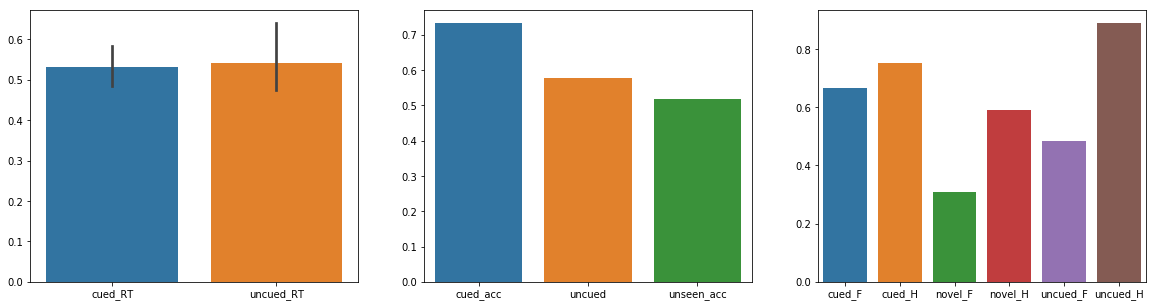

SUBJECT 1 Overview


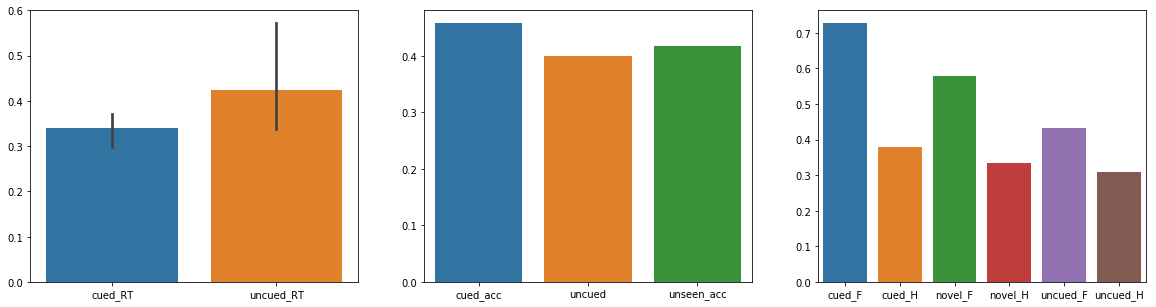

SUBJECT 2 Overview


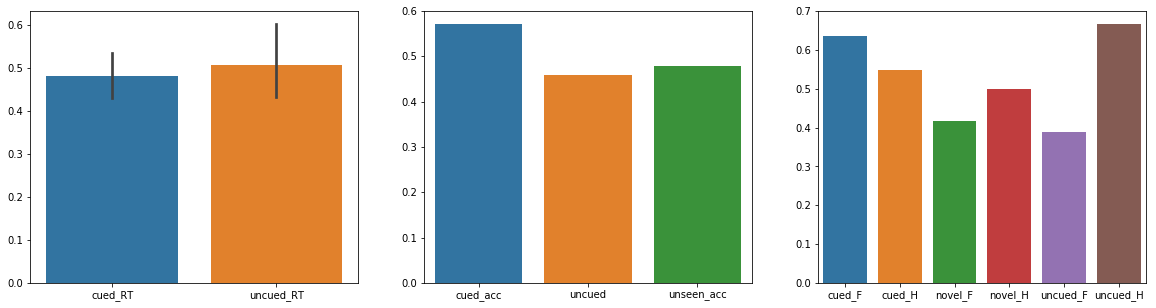

In [64]:
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib.gridspec as gridspec

for x,subject in enumerate(sub_data):
    
    print("SUBJECT " + str(x) + ' Overview')

    # can try to use the line below to ouput subplots for each subject
    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(20,5))#, gridspec_kw=gridkw)
    
    sns.barplot(data=plot_rl(subject), ax=ax1)
   
    sns.barplot(data=plot_response(subject), ax=ax2)
   
    sns.barplot(data=plot_response(subject, category=True), ax=ax3)
    
    plt.show()

